## Imports

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

## Data

In [54]:
cols_2d = ['x0', 'y0', 'x1', 'y1']
cols_3d = ['x0', 'y0', 'z0', 'x1', 'y1', 'z1']
res_path = 'resources/'
file_suffix = '.csv'
files = [['Gaussian 2D Narrow', '2d'], ['Gaussian 2D Overlap', '2d'], ['Gaussian 2D Wide', '2d'],
         ['Gaussian 3D Narrow', '3d'], ['Gaussian 3D Overlap', '3d'], ['Gaussian 3D Wide', '3d'],
         ['Moons 2D Narrow', '2d'], ['Moons 2D Overlap', '2d'], ['Moons 2D Wide', '2d']]

In [56]:
data = []
for file_name, data_type in files:
	d = pd.read_csv(res_path + file_name + file_suffix, header=None)
	if data_type == '2d':
		d.columns = cols_2d
		tensor = torch.tensor([[*d.x0.values, *d.x1.values], [*d.y0.values, *d.y1.values], [*[0] * len(d.x0), *[1] * len(d.x1)]]).T
	elif data_type == '3d':
		d.columns = cols_3d
		tensor = torch.tensor([[*d.x0.values, *d.x1.values], [*d.y0.values, *d.y1.values], [*d.z0.values, *d.z1.values], [*[0] * len(d.x0), *[1] * len(d.x1)]]).T
	else:
		raise NotImplementedError
	data.append([file_name, tensor, data_type])

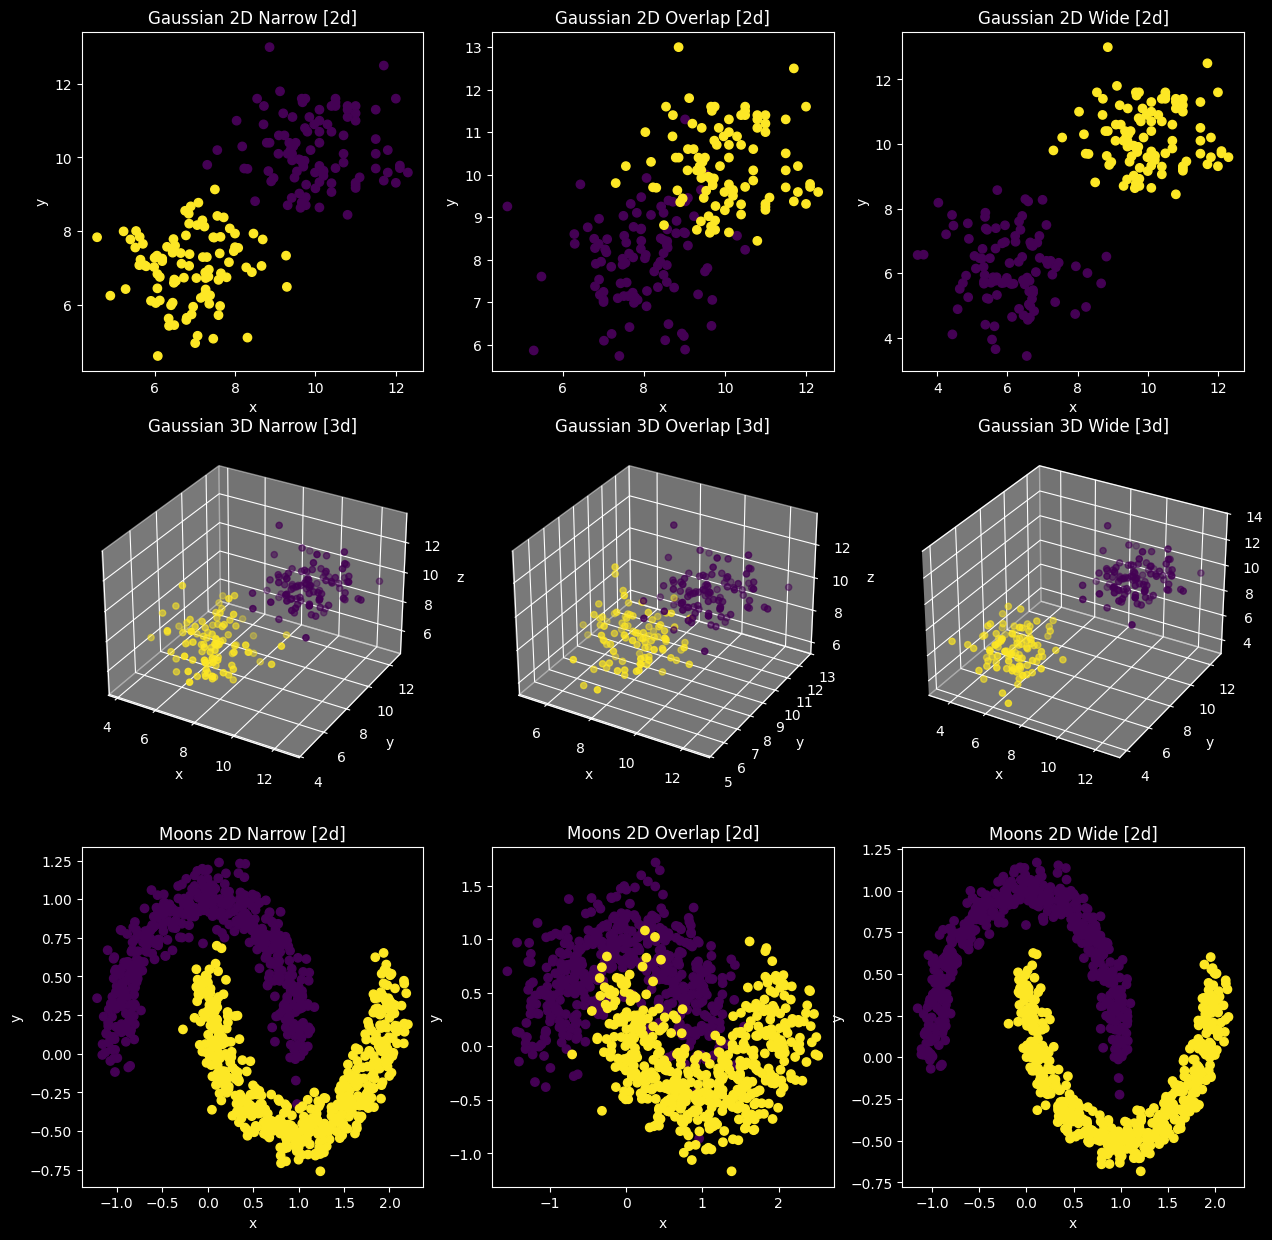

In [116]:
fig = plt.figure(figsize=(15, 15))
for i, d in enumerate(data):
	if d[2] == '2d':
		ax = fig.add_subplot(3, 3, i + 1)
		ax.scatter(d[1][:, 0], d[1][:, 1], c=d[1][:, 2])
	elif d[2] == '3d':
		ax = fig.add_subplot(3, 3, i + 1, projection='3d')
		ax.scatter(d[1][:, 0], d[1][:, 1], d[1][:, 2], c=d[1][:, 3])
		ax.set_zlabel('z')
	else:
		raise NotImplementedError
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_title(d[0] + f" [{d[2]}]")
plt.show()